In [119]:
import pandas as pd
from sklearn.metrics import confusion_matrix
dataframe= pd.read_csv("C:\\Users\\Clide Dcosta\\Desktop\\data science and decision making\\heart.csv")
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.calibration import calibration_curve

In [120]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [121]:
dataframe.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
dataframe.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


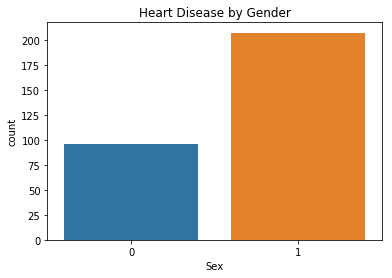

In [122]:
sns.countplot(x='sex', data=dataframe) #, palette="mako_r")
plt.xlabel("Sex")
plt.title('Heart Disease by Gender')
plt.show()
plt.ioff()

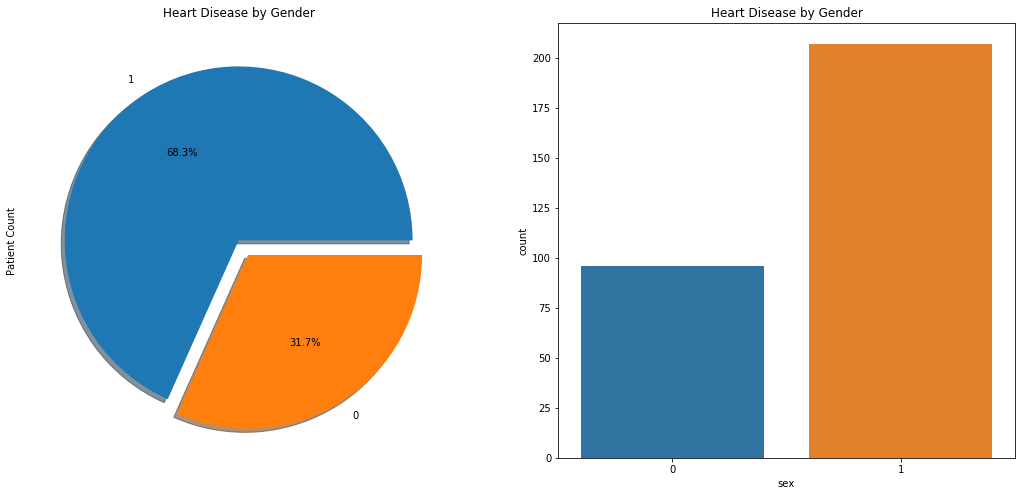

In [123]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataframe['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Heart Disease by Gender')
ax[0].set_ylabel('Patient Count')
sns.countplot('sex',data=dataframe,ax=ax[1])
ax[1].set_title('Heart Disease by Gender')
plt.ioff()
plt.show()

D:\narcos\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


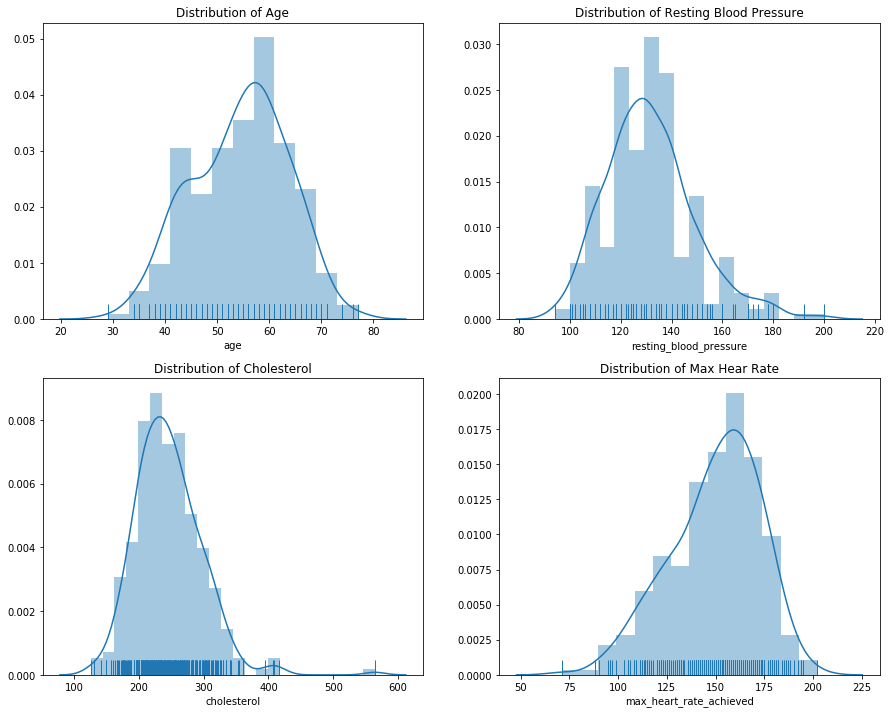

In [124]:
#Creating subplots
plt.figure(figsize=(15, 12))
#Subplot1 
plt.subplot(2,2,1)
plt.title('Distribution of Age')
sns.distplot(dataframe['age'], rug = True)

#Subplot2
plt.subplot(2,2,2)
plt.title('Distribution of Resting Blood Pressure')
sns.distplot(dataframe['resting_blood_pressure'], rug = True)

#Subplot3
plt.subplot(2,2,3)
plt.title('Distribution of Cholesterol')
sns.distplot(dataframe['cholesterol'], rug = True)


#Subplot4
plt.subplot(2,2,4)
plt.title('Distribution of Max Hear Rate')
sns.distplot(dataframe['max_heart_rate_achieved'], rug = True)
plt.ioff()
#plt.show()

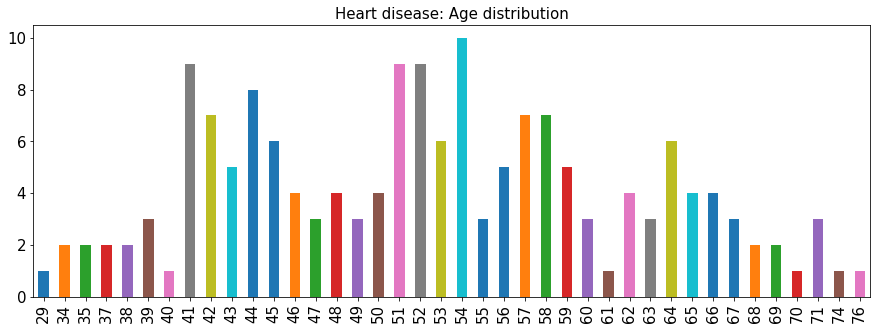

In [125]:
# Bar chart for age with sorted index
# Changing title fontsize -> We have to use alternative matplotlib set_title function
plot = dataframe[dataframe.target == 1].age.value_counts().sort_index().plot(kind = "bar", figsize=(15,5), fontsize = 15)
plot.set_title("Heart disease: Age distribution", fontsize = 15)
plt.ioff()

In [126]:
y=dataframe.target.values   # values => np array
x_data=dataframe.drop(["target"],axis=1)

In [127]:
#%% normalization   feature scaling
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [128]:
x.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
scores_accuracy=[]

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(x_train,y_train)

rf_score = rf.score(x_test,y_test)
scores_accuracy.append(["RF",rf_score])
prediction_of_probability = rf.predict_proba(x)
rf_score = rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
scores_accuracy.append(["RF",rf_score])
print("random forest result: ", rf.score(x_test,y_test))

random forest result:  0.8131868131868132


In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.813187,0.823529,0.84,0.831683


In [133]:
rf_y, rf_x = calibration_curve(y_test, prediction_of_probability[:,1], n_bins=10)

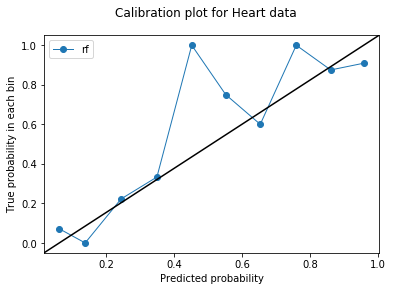

In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')

# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Heart data')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [84]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = prediction_of_probability [:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

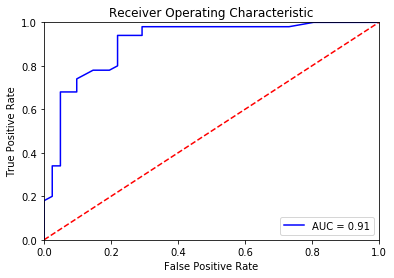

In [85]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [135]:
bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [136]:
x['No disease'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)

In [137]:
x['Disease'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)

In [138]:
x.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,No disease,Disease
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,0.2,0.9
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,0.2,0.9
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,0.1,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,0.1,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,0.2,0.9


In [93]:
x.drop(columns="prob_0",axis=1).head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,No disease,Disease
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,0.2,0.9
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,0.2,0.9
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,0.1,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,0.1,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,0.2,0.9


In [166]:
x.drop(columns="No disease",axis=1).head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,Disease
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,0.9
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,0.9
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,0.9


In [169]:
x1=x

In [32]:
#df_test = pd.DataFrame(x_test)
#df_test['target'] = y_test
#df_test['no disease'] = prediction_of_probability[:,0]
#df_test['disease'] = prediction_of_probability[:,1]
#df_test.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,no disease,disease
179,0.583333,1.0,0.000000,0.528302,0.342466,0.0,0.0,0.312977,1.0,0.096774,0.5,0.25,0.333333,0,0.90,0.10
228,0.625000,1.0,1.000000,0.716981,0.369863,0.0,0.0,0.671756,0.0,0.032258,0.5,0.00,1.000000,0,0.44,0.56
111,0.583333,1.0,0.666667,0.528302,0.000000,1.0,0.5,0.778626,0.0,0.032258,1.0,0.25,1.000000,1,0.44,0.56
246,0.562500,0.0,0.000000,0.377358,0.646119,0.0,0.0,0.603053,1.0,0.306452,0.5,0.50,1.000000,0,0.87,0.13
60,0.875000,0.0,0.666667,0.150943,0.317352,1.0,0.0,0.450382,0.0,0.000000,1.0,0.25,0.666667,1,0.20,0.80


In [33]:
#prediction = rf.predict_proba(x_train)
#df_1 = pd.DataFrame(x_train)
#df_1['target'] = y_train
#df_1['no disease'] = prediction[:,0]
#df_1['disease'] = prediction[:,1]
#df_1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,no disease,disease
124,0.208333,0.0,0.666667,0.000000,0.166667,0.0,0.5,0.824427,0.0,0.000000,1.0,0.0,0.666667,1,0.02,0.98
72,0.000000,1.0,0.333333,0.339623,0.178082,0.0,0.0,1.000000,0.0,0.000000,1.0,0.0,0.666667,1,0.02,0.98
15,0.437500,0.0,0.666667,0.245283,0.212329,0.0,0.5,0.664122,0.0,0.258065,0.5,0.0,0.666667,1,0.00,1.00
10,0.520833,1.0,0.000000,0.433962,0.257991,0.0,0.5,0.679389,0.0,0.193548,1.0,0.0,0.666667,1,0.06,0.94
163,0.187500,1.0,0.666667,0.415094,0.111872,0.0,0.5,0.778626,0.0,0.000000,1.0,1.0,0.666667,1,0.06,0.94


In [34]:
#df2 = df_test.append(df_1).sort_index()
#df2.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,no disease,disease
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1,0.16,0.84
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1,0.14,0.86
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1,0.01,0.99
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1,0.02,0.98
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1,0.12,0.88


In [35]:
#Learning decision tree on the new dataset
#X1= df2.drop('target',axis=1)
#y1 = df2['target'].values

In [170]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x1,y,test_size=0.2,random_state=0)

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rlf = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0).fit(X_train1,y_train1)
y_pred1 =rlf.predict(X_test1)
from sklearn import metrics
# classification rate
T=metrics.accuracy_score(y_test1, y_pred1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
#scores_accuracy1.append(["DT",T])


Accuracy: 0.9344262295081968


In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.934426,0.941176,0.941176,0.941176


In [143]:
#Evaluating the model after transferring the knowledge
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))  

Mean Absolute Error: 0.06557377049180328
Mean Squared Error: 0.06557377049180328
Root Mean Squared Error: 0.25607375986579195


In [144]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test1, y_pred1))  
print(classification_report(y_test1, y_pred1))  

[[25  2]
 [ 2 32]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.94      0.94      0.94        34

   micro avg       0.93      0.93      0.93        61
   macro avg       0.93      0.93      0.93        61
weighted avg       0.93      0.93      0.93        61



In [145]:
#Performing other classification algorithms on the dataset
# Logistic regression classication
# LR with sklearn

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.7912087912087912


D:\narcos\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [146]:
# KNN  classification
# Knn with sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.8131868131868132 


In [147]:
# SVM Classification
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.8461538461538461


D:\narcos\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [148]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.8351648351648352


In [149]:
# Decision Tree Classification
# Decision Tree With Sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.7252747252747253


In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.725275,0.790698,0.68,0.731183


In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.725275,0.790698,0.68,0.731183


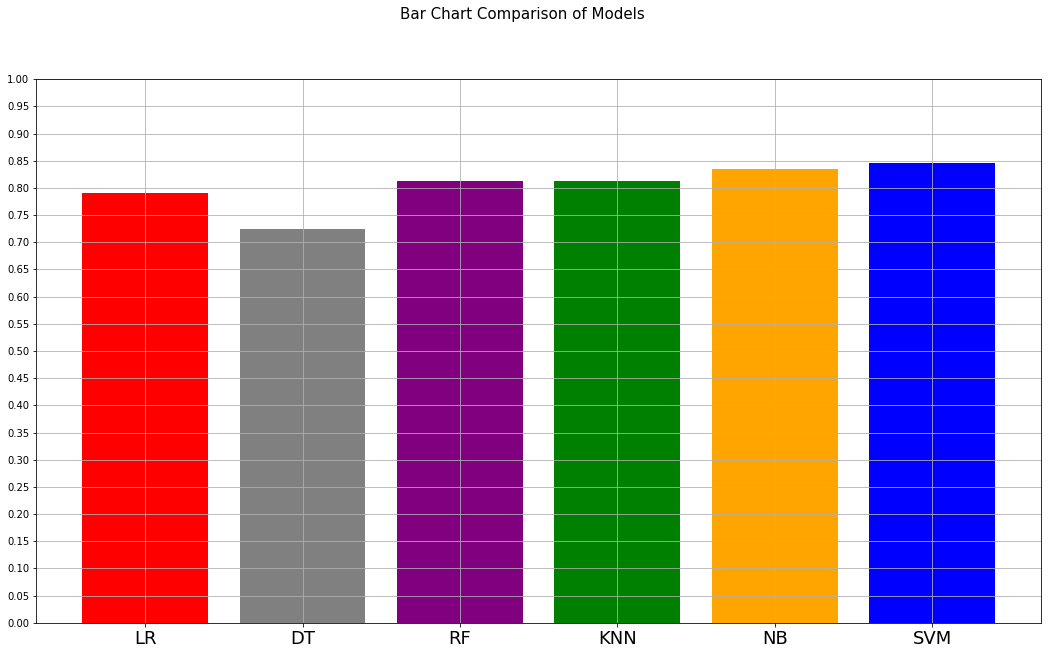

In [152]:
algorithms=("LR","DT","RF","KNN","NB","SVM")
scores = (lr_score,dt_score,rf_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

In [172]:
#Applying the ml algorithms on the dataset after transfrring the knowledge
# Logistic regression classication
# LR with sklearn
scores_accuracy1=[]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train1,y_train1)

lr_score1 = lr.score(X_test1,y_test1)
scores_accuracy1.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test1,y_test1)))


test accuracy 0.9836065573770492


D:\narcos\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [173]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(X_train1,y_train1)
prediction = knn.predict(X_test1)

knn_score1 = knn.score(X_test1,y_test1)
scores_accuracy1.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test1,y_test1)))

 9 nn score: 0.9344262295081968 


In [174]:
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train1,y_train1)

svm_score1 = svm.score(X_test1,y_test1)
scores_accuracy1.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test1,y_test1))

accuracy of svm algo:  0.9836065573770492


D:\narcos\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [175]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train1,y_train1)
nb_score1 = nb.score(X_test1,y_test1)
scores_accuracy1.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(X_test1,y_test1))

print accuracy of naive bayes algo:  0.9672131147540983
